<a href="https://colab.research.google.com/github/sandy777deep/Mobile/blob/master/icp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.5273 - val_loss: 0.4581
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.4256 - val_loss: 0.4060
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3952 - val_loss: 0.3876
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3776 - val_loss: 0.3711
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3624 - val_loss: 0.3579


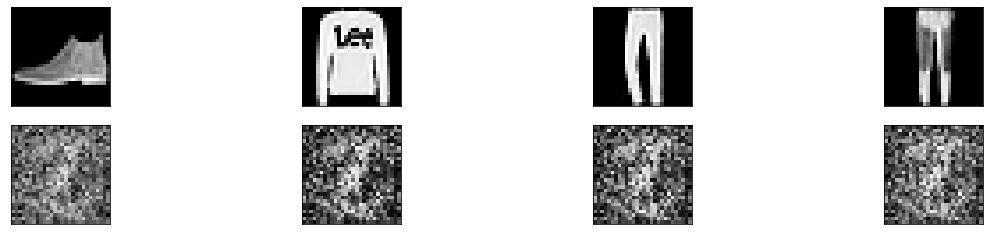

In [ ]:
from keras.layers import Input, Dense

from keras.models import Model



# this is the size of our encoded representations

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats



# this is our input placeholder

input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input

encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



from keras.datasets import mnist, fashion_mnist

import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



autoencoder.fit(x_train, x_train,

                epochs=5,

                batch_size=256,

                shuffle=True,

                validation_data=(x_test, x_test))


encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)


import matplotlib.pyplot as plt



n = 4

plt.figure(figsize=(20, 4))

for i in range(n):

    # display original

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)



    # display reconstruction

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.5386 - accuracy: 0.4389 - val_loss: 0.4621 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.4301 - accuracy: 0.4875 - val_loss: 0.4041 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3978 - accuracy: 0.4913 - val_loss: 0.3837 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3819 - accuracy: 0.4937 - val_loss: 0.3683 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3696 - accuracy: 0.4957 - val_loss: 0.3559 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3599 - accuracy: 0.4974 - val_loss: 0.3460 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [====================

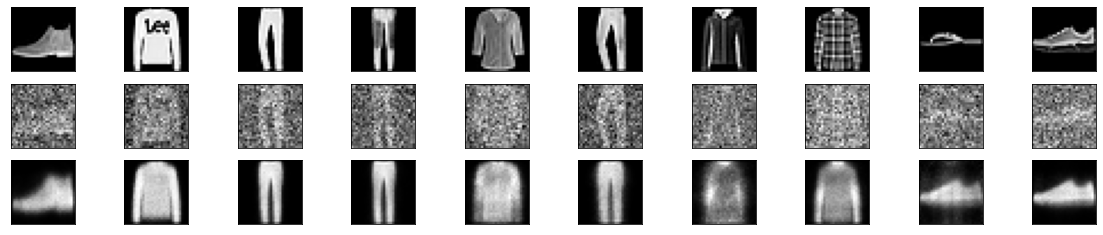

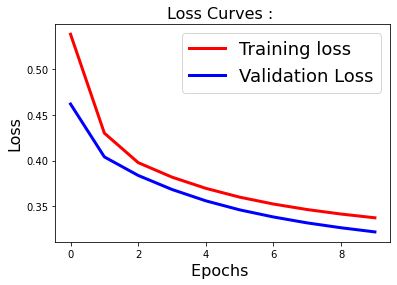

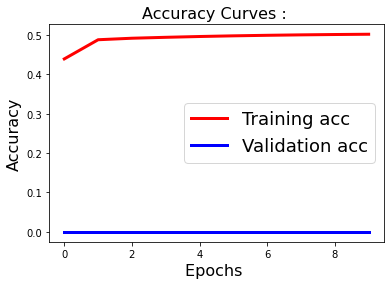

In [ ]:
from keras.layers import Input, Dense

from keras.models import Model

from keras.callbacks import TensorBoard




# this is the size of our encoded representations

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats



# this is our input placeholder

input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input

encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)



# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input

encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model

decoder_layer = autoencoder.layers[-1]

# create the decoder model

decoder = Model(encoded_input, decoder_layer(encoded_input))



# this model maps an input to its encoded representation

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import fashion_mnist

import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



#introducing noise

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)



tensorboard = TensorBoard(log_dir='2', histogram_freq=0, write_graph=True, write_images=False)

history = autoencoder.fit(x_train_noisy, x_train,

                epochs=10,

                batch_size=256,

                shuffle=True,

                validation_data=(x_test_noisy, x_test_noisy), callbacks=[tensorboard])



# encode and decode some digits

# note that we take them from the *test* set

encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)





import matplotlib.pyplot as plt



n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))

for i in range(n):

    # display original

    # print("original")

    ax = plt.subplot(3, n, i + 1)

    plt.imshow(x_test[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

    

    # display noisy data

    # print("noisy")

    ax = plt.subplot(3, n, i + 1 + n)

    plt.imshow(x_test_noisy[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)    



    # display reconstruction

    # print("reconstruction")

    ax = plt.subplot(3, n, i + 1 + n + n)

    plt.imshow(decoded_imgs[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()





# Saving the model

model_json = autoencoder.to_json()

with open("model.json", "w") as json_file:

    json_file.write(model_json)



# serialize weights to HDF5

autoencoder.save_weights("model.h5")



fig1 = plt.figure()

plt.plot(history.history['loss'], 'r', linewidth=3.0)

plt.plot(history.history['val_loss'], 'b', linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'], fontsize=18)

plt.xlabel('Epochs ', fontsize=16)

plt.ylabel('Loss', fontsize=16)

plt.title('Loss Curves : ', fontsize=16)

fig1.savefig('loss_lstm.png')



fig2 = plt.figure()
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)

plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)

plt.legend(['Training acc', 'Validation acc'], fontsize=18)

plt.xlabel('Epochs ', fontsize=16)

plt.ylabel('Accuracy', fontsize=16)

plt.title('Accuracy Curves : ', fontsize=16)

fig2.savefig('acc_lstm.png')


In [ ]:
from keras.layers import Input, Dense

from keras.models import Model



# this is the size of our encoded representations

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats



# this is our input placeholder

input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input

encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import fashion_mnist

import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



#introducing noise

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)



autoencoder.fit(x_train_noisy, x_train,

                epochs=10,

                batch_size=256,

                shuffle=True,

                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.5314 - val_loss: 0.4626
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.4325 - val_loss: 0.4064
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3991 - val_loss: 0.3860
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3833 - val_loss: 0.3710
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3709 - val_loss: 0.3582
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3605 - val_loss: 0.3475
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3521 - val_loss: 0.3388
Epoch 8/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3454 - val_loss: 0.3320
Epoch 9/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3401 - val_loss: 0.3263
Epoch

In [ ]:
from keras.layers import Input, Dense

from keras.models import Model



# this is the size of our encoded representations

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats



# this is our input placeholder

input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input

encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist, fashion_mnist

import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



autoencoder.fit(x_train, x_train,

                epochs=5,

                batch_size=256,

                shuffle=True,

                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.5338 - val_loss: 0.4606
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.4283 - val_loss: 0.4082
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3971 - val_loss: 0.3894
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3802 - val_loss: 0.3746
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3669 - val_loss: 0.3628
